# Using an LTSM RRN to predict England and Wales Energy Demand #

In [78]:
import pandas as pd
import os as os

Demand data taken from https://demandforecast.nationalgrid.com/efs_demand_forecast/faces/DataExplorer

In [80]:
fnames = ['demanddata_' + str(number) for number in range(2019,2024)]
df_dem = pd.read_csv("./Historics/" + fnames[0] + ".csv")
df_dem = df_dem[0:0]
for nm in fnames:
  tmp = pd.read_csv("./Historics/" + nm + ".csv")
  df_dem = pd.concat( [df_dem, tmp],axis = 0)

In [81]:
df_dem.head(5)

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW,SCOTTISH_TRANSFER,VIKING_FLOW
0,01-JAN-2019,1,23808,25291,22393,2548,5918,0,13052,0,...,1553,0,176,-455,-250,0,0,0,NaN,NaN
1,01-JAN-2019,2,24402,25720,22962,2475,5918,0,13052,0,...,1554,0,194,-455,-236,0,0,0,NaN,NaN
2,01-JAN-2019,3,24147,25495,22689,2396,5918,0,13052,0,...,1505,0,581,-410,-311,0,0,0,NaN,NaN
3,01-JAN-2019,4,23197,24590,21849,2317,5918,0,13052,0,...,1503,0,600,-450,-315,0,0,0,NaN,NaN
4,01-JAN-2019,5,22316,24346,20979,2236,5918,0,13052,0,...,1503,0,675,-442,-463,0,0,0,NaN,NaN


In [82]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87648 entries, 0 to 17519
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SETTLEMENT_DATE            87648 non-null  object 
 1   SETTLEMENT_PERIOD          87648 non-null  int64  
 2   ND                         87648 non-null  int64  
 3   TSD                        87648 non-null  int64  
 4   ENGLAND_WALES_DEMAND       87648 non-null  int64  
 5   EMBEDDED_WIND_GENERATION   87648 non-null  int64  
 6   EMBEDDED_WIND_CAPACITY     87648 non-null  int64  
 7   EMBEDDED_SOLAR_GENERATION  87648 non-null  int64  
 8   EMBEDDED_SOLAR_CAPACITY    87648 non-null  int64  
 9   NON_BM_STOR                87648 non-null  int64  
 10  PUMP_STORAGE_PUMPING       87648 non-null  int64  
 11  IFA_FLOW                   87648 non-null  int64  
 12  IFA2_FLOW                  87648 non-null  int64  
 13  BRITNED_FLOW               87648 non-null  int64  


In [83]:
df_dem.describe()

,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW,SCOTTISH_TRANSFER,VIKING_FLOW
count,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.00000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,17520.000000,17520.000000
mean,24.500228,27506.458790,29233.054468,25152.581348,1733.816299,6458.578564,1364.862986,13725.825552,1.190387,200.67301,733.046287,81.811587,415.736069,-88.953678,-10.866705,469.824936,290.444425,17.037890,1581.080936,5.664783
std,13.853873,6404.216122,6082.344964,5859.313451,1058.153280,151.016607,2105.775492,978.873697,17.105040,385.83157,1073.665522,562.374565,605.527538,279.073241,305.014680,579.514599,581.530681,429.661369,1826.648558,91.436006
min,1.000000,13367.000000,16513.000000,0.000000,147.000000,5918.000000,0.000000,13052.000000,0.000000,0.00000,-2056.000000,-1030.000000,-1076.000000,-505.000000,-585.000000,-1022.000000,-1455.000000,-1028.000000,-2851.000000,-1465.000000
25%,12.750000,22552.000000,24615.750000,20611.000000,882.000000,6488.000000,0.000000,13080.000000,0.000000,7.00000,-61.000000,-2.000000,0.000000,-381.000000,-181.000000,34.000000,0.000000,0.000000,142.000000,0.000000
50%,24.500000,26732.000000,28449.000000,24394.500000,1496.500000,6527.000000,9.000000,13080.000000,0.000000,11.00000,992.000000,0.000000,627.000000,-60.000000,0.000000,700.000000,0.000000,0.000000,1418.000000,0.000000
75%,36.250000,31630.000000,33014.250000,28922.000000,2380.000000,6545.000000,2230.000000,13861.000000,0.000000,123.00000,1706.000000,461.250000,968.000000,129.000000,148.000000,951.000000,693.000000,0.000000,2903.000000,0.000000
max,50.000000,47081.000000,48800.000000,42555.000000,5539.000000,6574.000000,9830.000000,15954.000000,585.000000,1939.00000,2065.000000,1016.000000,1088.000000,499.000000,504.000000,1033.000000,1401.000000,1002.000000,6238.000000,1408.000000


In [84]:
import matplotlib.pyplot as plt

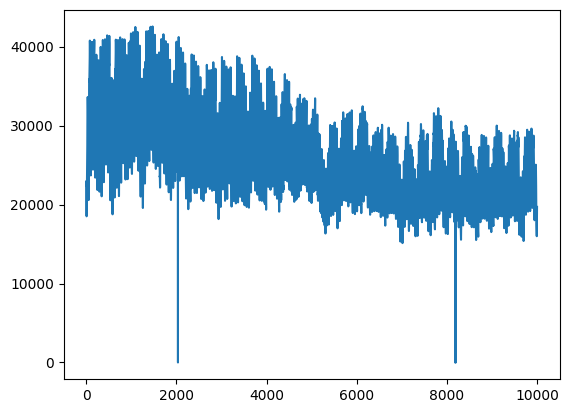

In [85]:
plt.plot(df_dem['ENGLAND_WALES_DEMAND'][0:10000])

## Fitting the training set to an LTSM ##


Long Short-Term Memory (LSTM) networks are a type of Recurrent Neural Network (RNN). They are designed to remember information for long periods, making them ideal for sequential or time-series data. In PyTorch, LSTMs are implemented through the torch.nn.LSTM module, allowing for easy construction of LSTM layers for models.

An LSTM (Long Short-Term Memory) network structure typically consists of a series of LSTM units, each comprising three main gates: input, forget, and output gates. These gates control the flow of information into the unit, out of the unit, and within its cell state, respectively, allowing the network to maintain and update its internal state over time. This structure enables LSTMs to effectively capture long-term dependencies in sequence data, making them well-suited for tasks like time series forecasting, natural language processing, and more complex sequence modeling tasks.

In [144]:
import torch
import torch.nn as nn
import numpy as np
from torch.autograd import Variable

In [145]:
class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, num_layers):
        super(LSTMNet, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        #LTSM layer
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers)
        #this is a regression NN so we need linear outputs. 
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq.view(len(input_seq), 1, -1))
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

We use 1 hidden layer and 1 input in real life we would need to do hyperparameter tuning to find the most efficient structure. 

In [146]:
input_size = 1
hidden_layer_size = 50
output_size = 1
num_layers = 1

model = LSTMNet(input_size, hidden_layer_size, output_size, num_layers)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [147]:
ntrain = 1000
ntest = 500

Split out training data and normalise

In [148]:
#normalise the training data
data = df_dem['ENGLAND_WALES_DEMAND'][0:ntrain]
data = torch.tensor(list(data), dtype=torch.float32)

In [149]:
#use the mean and sq from the training set
mean = torch.mean(data, dim=0)
std = torch.std(data, dim=0)
# Normalize the data
normalized_data = (data - mean) / std

In [150]:
data = normalized_data

Training loops in Pytorch all have a similar strcuture:
1) zero grad
2) forward propagation
3) back propagation to find grad
4) update optimiser

In [152]:
#training loop
epochs = 100
future = 1  # predict next 1 step
for i in range(epochs):
    for seq in range(len(data) - future):
        seq_data = data[seq:seq + future]
        next_value = data[seq + future: seq + future + 1]
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                             torch.zeros(1, 1, model.hidden_layer_size))
        y_pred = model(seq_data) # forward pass
        single_loss = loss_function(y_pred, next_value) #calculate loss
        single_loss.backward() #backward pass to calculate the grad
        optimizer.step() # optimiser step delta*grad 
    if i%2 == 0:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

epoch:   0 loss: 0.01975762
epoch:   2 loss: 0.02336663
epoch:   4 loss: 0.02292173
epoch:   6 loss: 0.02234505
epoch:   8 loss: 0.02196187
epoch:  10 loss: 0.02170439
epoch:  12 loss: 0.02159588
epoch:  14 loss: 0.02159564
epoch:  16 loss: 0.02167605
epoch:  18 loss: 0.02186358
epoch:  20 loss: 0.02210644
epoch:  22 loss: 0.02237707
epoch:  24 loss: 0.02264514
epoch:  26 loss: 0.02288713
epoch:  28 loss: 0.02307852
epoch:  30 loss: 0.02318995
epoch:  32 loss: 0.02320415
epoch:  34 loss: 0.02312755
epoch:  36 loss: 0.02297620
epoch:  38 loss: 0.02277088
epoch:  40 loss: 0.02253284
epoch:  42 loss: 0.02228038
epoch:  44 loss: 0.02202573
epoch:  46 loss: 0.02177522
epoch:  48 loss: 0.02153146
epoch:  50 loss: 0.02129659
epoch:  52 loss: 0.02107193
epoch:  54 loss: 0.02085735
epoch:  56 loss: 0.02065298
epoch:  58 loss: 0.02045865
epoch:  60 loss: 0.02027332
epoch:  62 loss: 0.02009857
epoch:  64 loss: 0.01992652
epoch:  66 loss: 0.01976332
epoch:  68 loss: 0.01960784
epoch:  70 loss: 0.0

In [153]:
model.eval()  # Set the model to evaluation mode

LSTMNet(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

## Predicting using the test data set ##

In [177]:
data_test = df_dem['ENGLAND_WALES_DEMAND'][ntrain+1:ntrain+1+ntest]
data_test = torch.tensor(list(data_test), dtype=torch.float32)

In [179]:
#scale the data - note we use the same mean and std as for the training set to avoid any information leekage
normalized_data_test = (data_test - mean) / std

In [180]:
normalized_data[-1]

tensor(1.2629)

In [181]:
normalized_data_test[0:1]

tensor([0.7284])

In [182]:
model(normalized_data_test[0:1])

tensor([0.7719], grad_fn=<SelectBackward0>)

In [183]:
res = torch.zeros(0)

In [184]:
for i in range(0,ntest):
    y_pred = model(normalized_data_test[i:i+1])
    res = torch.cat((res, y_pred))

In [185]:
tst = res.detach().numpy()

In [186]:
ref = normalized_data_test[0:ntest+1].detach().numpy()

In [169]:
import matplotlib.pyplot as plt

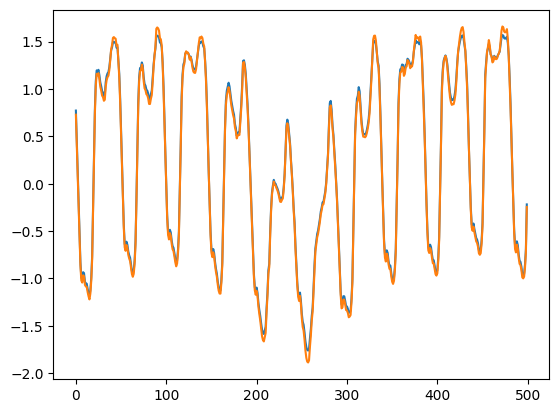

In [189]:
plt.plot(tst)
plt.plot(ref)
plt.show()